In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataframe = dataframe = pd.read_csv(r"C:\Users\Kunal\OneDrive\Desktop\Telecom-Customer-Churn-Prediction\data\Telecom_customer churn.csv")
dataframe.head(5)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [4]:
# Summarize the dataset
print("Number of rows and columns:", dataframe.shape)
print("\nData types:")
print(dataframe.dtypes)

# Check for missing values
print("\nMissing values:")
print(dataframe.isnull().sum())

# Check class balance for churn
if 'churn' in dataframe.columns:
    print("\nClass balance:")
    print(dataframe['churn'].value_counts(normalize=True))
else:
    print("\n'Churn' column not found in the dataset.")

Number of rows and columns: (100000, 100)

Data types:
rev_Mean       float64
mou_Mean       float64
totmrc_Mean    float64
da_Mean        float64
ovrmou_Mean    float64
                ...   
kid11_15        object
kid16_17        object
creditcd        object
eqpdays        float64
Customer_ID      int64
Length: 100, dtype: object

Missing values:
rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64

Class balance:
churn
0    0.50438
1    0.49562
Name: proportion, dtype: float64


VARIABLE DESCRIPTION   

1] **rev_Mean**: Mean monthly revenue (charge amount)  
2] **mou_Mean**: Mean number of monthly minutes of use  
3] **totmrc_Mean**: Mean total monthly recurring charge  
4] **da_Mean**: Mean number of directory assisted calls  
5] **ovrmou_Mean**: Mean overage minutes of use  
6] **ovrrev_Mean**: Mean overage revenue  
7] **vceovr_Mean**: Mean revenue of voice overage  
8] **datovr_Mean**: Mean revenue of data overage  
9] **roam_Mean**: Mean number of roaming calls  
10] **change_mou**: Percentage change in monthly minutes of use vs previous three-month average  
11] **change_rev**: Percentage change in monthly revenue vs previous three-month average  
12] **drop_vce_Mean**: Mean number of dropped (failed) voice calls  
13] **drop_dat_Mean**: Mean number of dropped (failed) data calls  
14] **blck_vce_Mean**: Mean number of blocked (failed) voice calls  
15] **blck_dat_Mean**: Mean number of blocked (failed) data calls  
16] **unan_vce_Mean**: Mean number of unanswered voice calls  
17] **unan_dat_Mean**: Mean number of unanswered data calls  
18] **plcd_vce_Mean**: Mean number of attempted voice calls placed  
19] **plcd_dat_Mean**: Mean number of attempted data calls placed  
20] **recv_vce_Mean**: Mean number of received voice calls  
21] **recv_sms_Mean**: N  
22] **comp_vce_Mean**: Mean number of completed voice calls  
23] **comp_dat_Mean**: Mean number of completed data calls  
24] **custcare_Mean**: Mean number of customer care calls  
25] **ccrndmou_Mean**: Mean rounded minutes of use of customer care calls  
26] **cc_mou_Mean**: Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls  
27] **inonemin_Mean**: Mean number of inbound calls less than one minute  
28] **threeway_Mean**: Mean number of three-way calls  
29] **mou_cvce_Mean**: Mean unrounded minutes of use of completed voice calls  
30] **mou_cdat_Mean**: Mean unrounded minutes of use of completed data calls  
31] **mou_rvce_Mean**: Mean unrounded minutes of use of received voice calls  
32] **owylis_vce_Mean**: Mean number of outbound wireless to wireless voice calls  
33] **mouowylisv_Mean**: Mean unrounded minutes of use of outbound wireless to wireless voice calls  
34] **iwylis_vce_Mean**: N  
35] **mouiwylisv_Mean**: Mean unrounded minutes of use of inbound wireless to wireless voice calls  
36] **peak_vce_Mean**: Mean number of inbound and outbound peak voice calls  
37] **peak_dat_Mean**: Mean number of peak data calls  
38] **mou_peav_Mean**: Mean unrounded minutes of use of peak voice calls  
39] **mou_pead_Mean**: Mean unrounded minutes of use of peak data calls  
40] **opk_vce_Mean**: Mean number of off-peak voice calls  
41] **opk_dat_Mean**: Mean number of off-peak data calls  
42] **mou_opkv_Mean**: Mean unrounded minutes of use of off-peak voice calls  
43] **mou_opkd_Mean**: Mean unrounded minutes of use of off-peak data calls  
44] **drop_blk_Mean**: Mean number of dropped or blocked calls  
45] **attempt_Mean**: Mean number of attempted calls  
46] **complete_Mean**: Mean number of completed calls  
47] **callfwdv_Mean**: Mean number of call forwarding calls  
48] **callwait_Mean**: Mean number of call waiting calls  
49] **churn**: Instance of churn between 31-60 days after observation date  
50] **months**: Total number of months in service  
51] **uniqsubs**: Number of unique subscribers in the household  
52] **actvsubs**: Number of active subscribers in the household  
53] **new_cell**: New cell phone user  
54] **crclscod**: Credit class code  
55] **asl_flag**: Account spending limit  
56] **totcalls**: Total number of calls over the life of the customer  
57] **totmou**: Total minutes of use over the life of the customer  
58] **totrev**: Total revenue  
59] **adjrev**: Billing adjusted total revenue over the life of the customer  
60] **adjmou**: Billing adjusted total minutes of use over the life of the customer  
61] **adjqty**: Billing adjusted total number of calls over the life of the customer  
62] **avgrev**: Average monthly revenue over the life of the customer  
63] **avgmou**: Average monthly minutes of use over the life of the customer  
64] **avgqty**: Average monthly number of calls over the life of the customer  
65] **avg3mou**: Average monthly minutes of use over the previous three months  
66] **avg3qty**: Average monthly number of calls over the previous three months  
67] **avg3rev**: Average monthly revenue over the previous three months  
68] **avg6mou**: Average monthly minutes of use over the previous six months  
69] **avg6qty**: Average monthly number of calls over the previous six months  
70] **avg6rev**: Average monthly revenue over the previous six months  
71] **prizm_social_one**: Social group letter only  
72] **area**: Geographic area  
73] **dualband**: Dualband  
74] **refurb_new**: Handset: refurbished or new  
75] **hnd_price**: Current handset price  
76] **phones**: Number of handsets issued  
77] **models**: Number of models issued  
78] **hnd_webcap**: Handset web capability  
79] **truck**: Truck indicator  
80] **rv**: RV indicator  
81] **ownrent**: Homeowner/renter status  
82] **lor**: Length of residence  
83] **dwlltype**: Dwelling unit type  
84] **marital**: Marital status  
85] **adults**: Number of adults in the household  
86] **infobase**: InfoBase match  
87] **income**: Estimated income  
88] **numbcars**: Known number of vehicles  
89] **HHstatin**: Premier household status indicator  
90] **dwllsize**: Dwelling size  
91] **forgntvl**: Foreign travel dummy variable  
92] **ethnic**: Ethnicity roll-up code  
93] **kid0_2**: Child 0 - 2 years of age in the household  
94] **kid3_5**: Child 3 - 5 years of age in the household  
95] **kid6_10**: Child 6 - 10 years of age in the household  
96] **kid11_15**: Child 11 - 15 years of age in the household  
97] **kid16_17**: Child 16 - 17 years of age in the household  
98] **creditcd**: Credit card indicator  
99] **eqpdays**: Number of days (age) of current equipment  
100] **Customer_ID**: N  

In [5]:
# We want to observe the types of variables in the dataset and whether they contain null values.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [6]:
# from the data description, we can see that Customer_ID is unique - therefor it not provides us information we can learn.
dataframe.drop(["Customer_ID"], axis = 1, inplace=True)

In [7]:
# Finding Missing Values
dataframe.columns[dataframe.isnull().any()]

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'prizm_social_one',
       'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 'models',
       'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'marital',
       'adults', 'infobase', 'income', 'numbcars', 'HHstatin', 'dwllsize',
       'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15',
       'kid16_17', 'creditcd', 'eqpdays'],
      dtype='object')

In [8]:
# We dropped the columns that seem to have no significant contribution to the model.
dataframe.drop(['numbcars','dwllsize','HHstatin','ownrent','dwlltype','lor', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'eqpdays','income','adults','prizm_social_one','infobase','crclscod'],axis=1,inplace=True)

In [9]:
dataframe.dropna(inplace=True)

In [10]:
# Filling NaN values with mean of the column.
dataframe['hnd_webcap']=dataframe['hnd_webcap'].fillna('UNKW') # Handset web capability

dataframe['avg6qty']=dataframe['avg6qty'].fillna(dataframe['avg6qty'].mean()) # Billing adjusted total number of calls over the life of the customer
dataframe['avg6rev']=dataframe['avg6rev'].fillna(dataframe['avg6rev'].mean()) # Average monthly revenue over the life of the customer
dataframe['avg6mou']=dataframe['avg6mou'].fillna(dataframe['avg6mou'].mean()) # Average monthly minutes of use over the life of the customer

dataframe['change_mou']=dataframe['change_mou'].fillna(dataframe['change_mou'].mean()) # Percentage change in monthly minutes of use vs previous three month average
dataframe['change_rev']=dataframe['change_rev'].fillna(dataframe['change_rev'].mean()) # Percentage change in monthly revenue vs previous three month average

dataframe['rev_Mean']=dataframe['rev_Mean'].fillna(dataframe['rev_Mean'].mean())
dataframe['totmrc_Mean']=dataframe['totmrc_Mean'].fillna(dataframe['totmrc_Mean'].mean())
dataframe['da_Mean']=dataframe['da_Mean'].fillna(dataframe['da_Mean'].mean())
dataframe['ovrmou_Mean']=dataframe['ovrmou_Mean'].fillna(dataframe['ovrmou_Mean'].mean())
dataframe['ovrrev_Mean']=dataframe['ovrrev_Mean'].fillna(dataframe['ovrrev_Mean'].mean())
dataframe['vceovr_Mean']=dataframe['vceovr_Mean'].fillna(dataframe['vceovr_Mean'].mean())
dataframe['datovr_Mean']=dataframe['datovr_Mean'].fillna(dataframe['datovr_Mean'].mean())
dataframe['roam_Mean']=dataframe['roam_Mean'].fillna(dataframe['roam_Mean'].mean())
dataframe['mou_Mean']=dataframe['mou_Mean'].fillna(dataframe['mou_Mean'].mean())

In [11]:
dataframe.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,marital,forgntvl
0,23.9975,219.25,22.50,0.2475,0.0,0.0,0.0,0.0,0.0,-157.25,...,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,S,0.0
4,55.2300,570.50,71.98,0.0000,0.0,0.0,0.0,0.0,0.0,38.50,...,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,S,0.0
5,82.2750,1312.25,75.00,1.2375,0.0,0.0,0.0,0.0,0.0,156.75,...,N,N,129.98999,9.0,4.0,WCMB,0.0,0.0,S,0.0
7,38.0525,682.50,52.49,0.2475,0.0,0.0,0.0,0.0,0.0,147.50,...,Y,N,79.98999,3.0,2.0,WCMB,0.0,0.0,M,1.0
9,31.6625,25.50,29.99,0.2475,0.0,0.0,0.0,0.0,0.0,59.50,...,Y,N,79.98999,2.0,2.0,WCMB,0.0,0.0,M,1.0


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84074 entries, 0 to 99993
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rev_Mean         84074 non-null  float64
 1   mou_Mean         84074 non-null  float64
 2   totmrc_Mean      84074 non-null  float64
 3   da_Mean          84074 non-null  float64
 4   ovrmou_Mean      84074 non-null  float64
 5   ovrrev_Mean      84074 non-null  float64
 6   vceovr_Mean      84074 non-null  float64
 7   datovr_Mean      84074 non-null  float64
 8   roam_Mean        84074 non-null  float64
 9   change_mou       84074 non-null  float64
 10  change_rev       84074 non-null  float64
 11  drop_vce_Mean    84074 non-null  float64
 12  drop_dat_Mean    84074 non-null  float64
 13  blck_vce_Mean    84074 non-null  float64
 14  blck_dat_Mean    84074 non-null  float64
 15  unan_vce_Mean    84074 non-null  float64
 16  unan_dat_Mean    84074 non-null  float64
 17  plcd_vce_Mean    

In [13]:
dataframe.corr

<bound method DataFrame.corr of          rev_Mean     mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  \
0       23.997500   219.250000        22.50   0.2475     0.000000   
4       55.230000   570.500000        71.98   0.0000     0.000000   
5       82.275000  1312.250000        75.00   1.2375     0.000000   
7       38.052500   682.500000        52.49   0.2475     0.000000   
9       31.662500    25.500000        29.99   0.2475     0.000000   
...           ...          ...          ...      ...          ...   
99976   31.923333    63.333333        16.99   0.0000    42.666667   
99981   34.990000     6.333333        44.99   0.0000     0.000000   
99984   85.150000   815.000000        87.99   0.0000     1.000000   
99986  117.490000   384.000000        29.99   0.0000   250.000000   
99993   95.170000  1745.000000        84.99   0.9900    45.000000   

       ovrrev_Mean  vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  \
0         0.000000     0.000000         0.00       0.00 -157.25

In [14]:
dataframe.mean

<bound method DataFrame.mean of          rev_Mean     mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  \
0       23.997500   219.250000        22.50   0.2475     0.000000   
4       55.230000   570.500000        71.98   0.0000     0.000000   
5       82.275000  1312.250000        75.00   1.2375     0.000000   
7       38.052500   682.500000        52.49   0.2475     0.000000   
9       31.662500    25.500000        29.99   0.2475     0.000000   
...           ...          ...          ...      ...          ...   
99976   31.923333    63.333333        16.99   0.0000    42.666667   
99981   34.990000     6.333333        44.99   0.0000     0.000000   
99984   85.150000   815.000000        87.99   0.0000     1.000000   
99986  117.490000   384.000000        29.99   0.0000   250.000000   
99993   95.170000  1745.000000        84.99   0.9900    45.000000   

       ovrrev_Mean  vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  \
0         0.000000     0.000000         0.00       0.00 -157.25

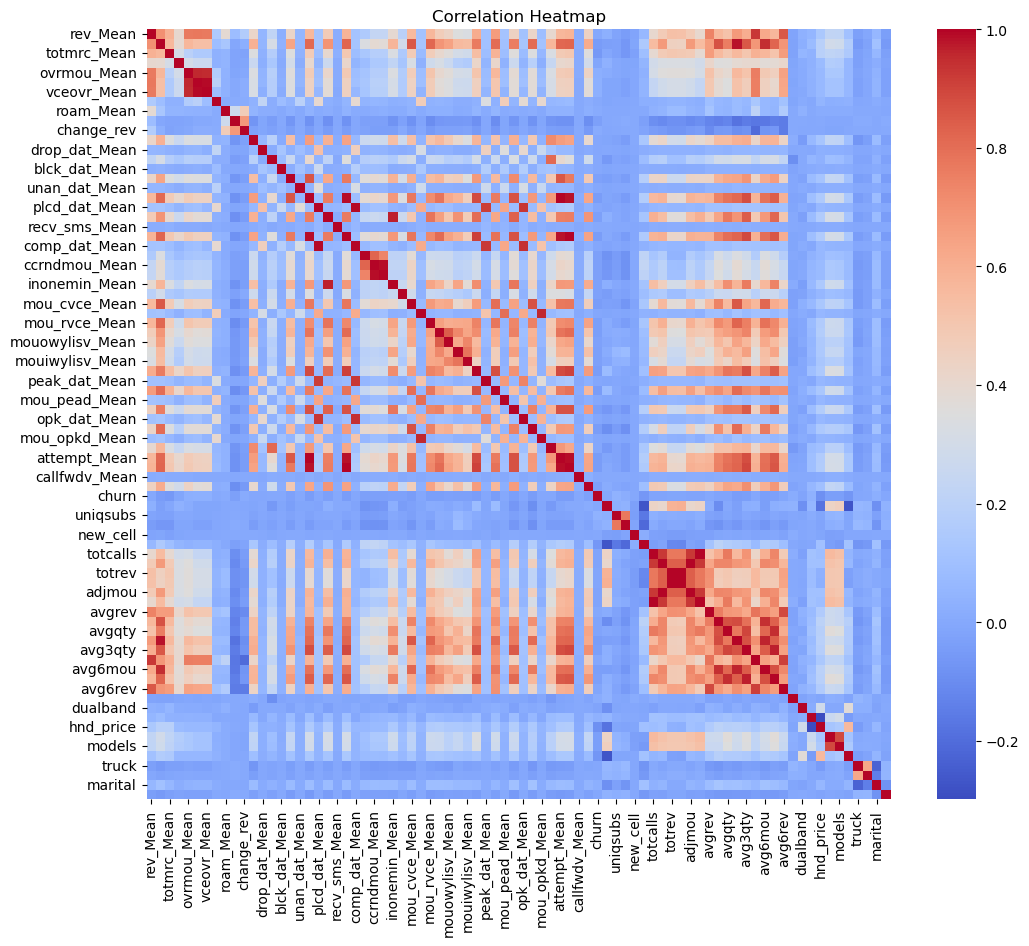

In [15]:
# Handle non-numeric columns for correlation analysis
# Convert categorical columns to numeric using label encoding for correlation analysis
from sklearn.preprocessing import LabelEncoder

# Identify non-numeric columns
non_numeric_cols = dataframe.select_dtypes(include=['object']).columns

# Apply label encoding to non-numeric columns
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    dataframe[col] = le.fit_transform(dataframe[col].astype(str))
    label_encoders[col] = le

# Now, calculate the correlation matrix
plt.figure(figsize=(12, 10))
corr = dataframe.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

few more steps of preprocessing can be down to understand statistics of the Dataset.

NOW WE IMPLEMENT THE MODEL TRAINING PROCESS

In [16]:
# Performing train test split
from sklearn.model_selection import train_test_split

# Assuming 'churn' is the target variable and exists in the dataframe
X = dataframe.drop(['Customer_ID', 'churn'], axis=1, errors='ignore')
y = dataframe['churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(67259, 79), y_train=(67259,)
Testing set shape: X_test=(16815, 79), y_test=(16815,)


In [17]:
from sklearn.preprocessing import LabelEncoder

# Handle non-numeric data (e.g., 'N', 'yes', etc.) before model training
def preprocess_data(dataframe):
    # Convert categorical columns to numeric (if any)
    for column in dataframe.select_dtypes(include=['object']).columns:
        # If the column contains 'yes'/'no', map them to 1/0
        if dataframe[column].dtype == 'object':
            # Example mapping: 'N' -> 0, 'Y' -> 1 (or you can use LabelEncoder)
            dataframe[column] = dataframe[column].map({'N': 0, 'Y': 1, 'yes': 1, 'no': 0})
            # If there are other categorical variables, you can use LabelEncoder or pd.get_dummies
            # For general encoding, you can use LabelEncoder or pd.get_dummies
            if dataframe[column].isnull().any():
                dataframe[column] = dataframe[column].fillna(-1)  # Or any other imputation strategy
            elif not dataframe[column].dtype in ['int', 'float']:
                label_encoder = LabelEncoder()
                dataframe[column] = label_encoder.fit_transform(dataframe[column])
                
    # Ensure all columns are numeric for model training
    dataframe = dataframe.apply(pd.to_numeric, errors='coerce')
    
    return dataframe

# Example of using the preprocess function before model training
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Now you can proceed with feature selection


In [18]:
dataframe.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,marital,forgntvl
0,23.9975,219.25,22.50,0.2475,0.0,0.0,0.0,0.0,0.0,-157.25,...,2,0,149.98999,2.0,2.0,1,0.0,0.0,3,0.0
4,55.2300,570.50,71.98,0.0000,0.0,0.0,0.0,0.0,0.0,38.50,...,2,0,149.98999,6.0,4.0,1,0.0,0.0,3,0.0
5,82.2750,1312.25,75.00,1.2375,0.0,0.0,0.0,0.0,0.0,156.75,...,0,0,129.98999,9.0,4.0,1,0.0,0.0,3,0.0
7,38.0525,682.50,52.49,0.2475,0.0,0.0,0.0,0.0,0.0,147.50,...,2,0,79.98999,3.0,2.0,1,0.0,0.0,2,1.0
9,31.6625,25.50,29.99,0.2475,0.0,0.0,0.0,0.0,0.0,59.50,...,2,0,79.98999,2.0,2.0,1,0.0,0.0,2,1.0


In [19]:
# Feature Engineering: Apply Column Transformation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Display the shape of the transformed data
X_train_transformed.shape, X_test_transformed.shape

((67259, 72), (16815, 72))

In [20]:
# Feature Engineering: Create new features
# Example: Create a feature for total overage
if 'ovrmou_Mean' in dataframe.columns and 'ovrrev_Mean' in dataframe.columns:
    dataframe['total_overage'] = dataframe['ovrmou_Mean'] + dataframe['ovrrev_Mean']

# Display the first few rows to verify the new feature
dataframe.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,marital,forgntvl,total_overage
0,23.9975,219.25,22.50,0.2475,0.0,0.0,0.0,0.0,0.0,-157.25,...,0,149.98999,2.0,2.0,1,0.0,0.0,3,0.0,0.0
4,55.2300,570.50,71.98,0.0000,0.0,0.0,0.0,0.0,0.0,38.50,...,0,149.98999,6.0,4.0,1,0.0,0.0,3,0.0,0.0
5,82.2750,1312.25,75.00,1.2375,0.0,0.0,0.0,0.0,0.0,156.75,...,0,129.98999,9.0,4.0,1,0.0,0.0,3,0.0,0.0
7,38.0525,682.50,52.49,0.2475,0.0,0.0,0.0,0.0,0.0,147.50,...,0,79.98999,3.0,2.0,1,0.0,0.0,2,1.0,0.0
9,31.6625,25.50,29.99,0.2475,0.0,0.0,0.0,0.0,0.0,59.50,...,0,79.98999,2.0,2.0,1,0.0,0.0,2,1.0,0.0


In [21]:
# Feature Selection: Retain only relevant features using ANOVA F-value
from sklearn.feature_selection import SelectKBest, f_classif

def select_top_features(X_train, y_train, X_test, k=10):
    """
    Selects the top `k` features based on ANOVA F-value.

    Parameters:
    - X_train: Transformed training features
    - y_train: Training target variable
    - X_test: Transformed test features
    - k: Number of top features to select

    Returns:
    - X_train_selected: Training data with selected features
    - X_test_selected: Test data with selected features
    - selected_indices: Indices of selected features
    """
    # Initialize selector
    selector = SelectKBest(score_func=f_classif, k=k)

    # Fit selector on training data and transform both train and test sets
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # Extract indices of selected features
    selected_indices = selector.get_support(indices=True)

    return X_train_selected, X_test_selected, selected_indices

# Usage
X_train_selected, X_test_selected, selected_indices = select_top_features(X_train_transformed, y_train, X_test_transformed)

# Display the selected feature indices for debugging or further analysis
print(f"Selected feature indices: {selected_indices}")


Selected feature indices: [ 1  2 21 28 35 37 45 49 60 66]


In [22]:
# Required Libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import logging

# Setup Logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")
logger = logging.getLogger()

# Evaluation Function
def evaluate_model(y_true, y_pred):
    """
    Evaluate a model using common regression metrics.
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

# Cross-Validation Function
def cross_val_evaluation(model, X, y, cv=5):
    """
    Perform cross-validation and return average RMSE and R² scores.
    """
    cv_mse = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    cv_r2 = cross_val_score(model, X, y, cv=cv, scoring='r2', n_jobs=-1)
    return {"CV_RMSE": np.sqrt(-cv_mse.mean()), "CV_R2": cv_r2.mean()}

# Check GPU Support for Optional Models
def safe_model_init(model_class, **kwargs):
    try:
        return model_class(**kwargs)
    except Exception as e:
        logger.warning(f"{model_class.__name__} initialization failed with error: {e}. Using CPU fallback.")
        if "task_type" in kwargs:
            kwargs["task_type"] = "CPU"
        if "device" in kwargs:
            kwargs["device"] = "cpu"
        return model_class(**kwargs)

# ML Models Dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "ElasticNet Regression": ElasticNet(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=10),  # Reduced for performance
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=10),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBoost Regressor": XGBRegressor(tree_method="auto"),  # Avoid GPU by default
    "CatBoost Regressor": CatBoostRegressor(n_estimators=10, verbose=False),  # CPU-only fallback
    "LightGBM Regressor": LGBMRegressor(n_estimators=10)  # GPU removed temporarily
}


# Model Training and Evaluation
def train_and_evaluate(model_name, model, X_train, y_train, X_test, y_test):
    """
    Train and evaluate a model, including cross-validation.
    """
    logger.info(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train/Test performance
    train_metrics = evaluate_model(y_train, y_train_pred)
    test_metrics = evaluate_model(y_test, y_test_pred)

    # Cross-validation metrics
    cv_metrics = cross_val_evaluation(model, X_train, y_train)

    # Combine results
    result = {
        "Model": model_name,
        **train_metrics,
        **test_metrics,
        **cv_metrics
    }
    logger.info(f"{model_name} completed. Test R²: {test_metrics['R2']:.4f}, CV Test R²: {cv_metrics['CV_R2']:.4f}")
    return result

# Parallel Training
results = []
with ThreadPoolExecutor() as executor:
    futures = [
        executor.submit(train_and_evaluate, name, model, X_train, y_train, X_test, y_test)
        for name, model in models.items()
    ]
    for future in futures:
        try:
            results.append(future.result())
        except Exception as e:
            logger.error(f"Error during model training: {e}")

# Sort Results by Test R²
sorted_results = sorted(results, key=lambda x: x["R2"], reverse=True)

# Print Results
for result in sorted_results:
    logger.info(result)


2025-01-05 17:07:51,377 [INFO] Training Linear Regression...
2025-01-05 17:07:51,378 [INFO] Training Lasso Regression...
2025-01-05 17:07:51,378 [INFO] Training Ridge Regression...
2025-01-05 17:07:51,392 [INFO] Training ElasticNet Regression...
2025-01-05 17:07:51,399 [INFO] Training K-Neighbors Regressor...
2025-01-05 17:07:51,414 [INFO] Training Decision Tree Regressor...
2025-01-05 17:07:51,414 [INFO] Training Random Forest Regressor...
2025-01-05 17:07:51,430 [INFO] Training Gradient Boosting Regressor...
2025-01-05 17:07:51,430 [INFO] Training AdaBoost Regressor...
2025-01-05 17:07:51,441 [INFO] Training XGBoost Regressor...
2025-01-05 17:07:51,447 [INFO] Training CatBoost Regressor...
2025-01-05 17:07:51,447 [INFO] Training LightGBM Regressor...
2025-01-05 17:08:26,710 [INFO] Linear Regression completed. Test R²: 0.0234, CV Test R²: 0.0288
2025-01-05 17:08:26,728 [INFO] Ridge Regression completed. Test R²: 0.0235, CV Test R²: 0.0288
2025-01-05 17:08:28,091 [INFO] Lasso Regressio

In [23]:
# Display Model Performance Summary
print("\n=== Model Performance Summary ===")
for result in sorted_results:
    print(f"Model: {result['Model']}")
    print(f"- Train R²: {result['R2']:.4f}, Test R²: {result['R2']:.4f}, CV Test R²: {result['CV_R2']:.4f}")
    print(f"- Train RMSE: {result['RMSE']:.4f}, Test RMSE: {result['RMSE']:.4f}, CV Test RMSE: {result['CV_RMSE']:.4f}")
    print(f"- Train MAE: {result['MAE']:.4f}, Test MAE: {result['MAE']:.4f}")
    print("-" * 40)


=== Model Performance Summary ===
Model: CatBoost Regressor
- Train R²: 0.0793, Test R²: 0.0793, CV Test R²: 0.0737
- Train RMSE: 0.4795, Test RMSE: 0.4795, CV Test RMSE: 0.4811
- Train MAE: 0.4653, Test MAE: 0.4653
----------------------------------------
Model: LightGBM Regressor
- Train R²: 0.0604, Test R²: 0.0604, CV Test R²: 0.0598
- Train RMSE: 0.4844, Test RMSE: 0.4844, CV Test RMSE: 0.4846
- Train MAE: 0.4787, Test MAE: 0.4787
----------------------------------------
Model: Gradient Boosting Regressor
- Train R²: 0.0409, Test R²: 0.0409, CV Test R²: 0.0411
- Train RMSE: 0.4894, Test RMSE: 0.4894, CV Test RMSE: 0.4895
- Train MAE: 0.4856, Test MAE: 0.4856
----------------------------------------
Model: AdaBoost Regressor
- Train R²: 0.0395, Test R²: 0.0395, CV Test R²: 0.0400
- Train RMSE: 0.4898, Test RMSE: 0.4898, CV Test RMSE: 0.4896
- Train MAE: 0.4786, Test MAE: 0.4786
----------------------------------------
Model: Ridge Regression
- Train R²: 0.0235, Test R²: 0.0235, CV 

In [24]:
# Hyperparameter Tuning for CatBoost Regressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for CatBoost
param_grid_catboost = {
    'iterations': [100, 200],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize CatBoost Regressor
catboost_regressor = CatBoostRegressor(verbose=False)

# Initialize GridSearchCV
grid_search_catboost = GridSearchCV(estimator=catboost_regressor, param_grid=param_grid_catboost, cv=3, scoring='r2', n_jobs=-1)

# Fit GridSearchCV
grid_search_catboost.fit(X_train_selected, y_train)

# Best parameters and score
best_params_catboost = grid_search_catboost.best_params_
best_score_catboost = grid_search_catboost.best_score_

best_params_catboost, best_score_catboost

({'depth': 6, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.1},
 0.02920876386526679)

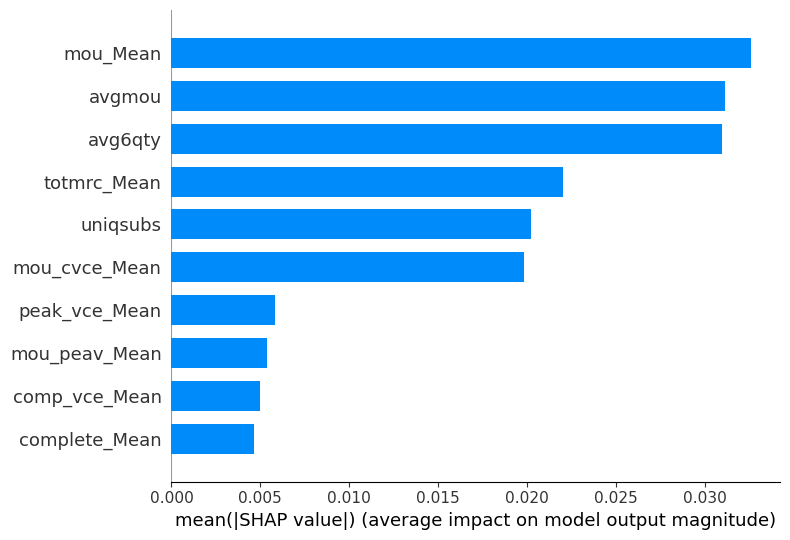

In [25]:
# Model Interpretability using SHAP for CatBoost Regressor
import shap

# Fit the best CatBoost model
best_catboost = CatBoostRegressor(**best_params_catboost, verbose=False)
best_catboost.fit(X_train_selected, y_train)

# Initialize SHAP explainer
explainer = shap.Explainer(best_catboost)

# Calculate SHAP values
shap_values = explainer(X_test_selected)

# Improved summary plot with bar plot
shap.summary_plot(shap_values, X_test_selected, feature_names=[X.columns[i] for i in selected_indices], plot_type='bar')

In [26]:
# Ensemble Methods: Combine predictions from multiple models
from sklearn.ensemble import VotingRegressor

# Initialize top-performing models
catboost = CatBoostRegressor(**best_params_catboost, verbose=False)
lightgbm = LGBMRegressor()
gradient_boosting = GradientBoostingRegressor()

# Create a Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('catboost', catboost),
    ('lightgbm', lightgbm),
    ('gradient_boosting', gradient_boosting)
])

# Fit the Voting Regressor
voting_regressor.fit(X_train_selected, y_train)

# Evaluate the ensemble model
y_pred_ensemble = voting_regressor.predict(X_test_selected)
ensemble_metrics = evaluate_model(y_test, y_pred_ensemble)

# Display ensemble model performance
ensemble_metrics

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2070
[LightGBM] [Info] Number of data points in the train set: 67259, number of used features: 10
[LightGBM] [Info] Start training from score 0.487117


{'MAE': 0.48607733765642713,
 'RMSE': 0.49174695355193226,
 'R2': 0.03183860198932953}

In [27]:
import pickle

# Save the ensemble model to a pickle file
with open('voting_regressor_model.pkl', 'wb') as file:
    pickle.dump(voting_regressor, file)

print("Model saved to voting_regressor_model.pkl")

Model saved to voting_regressor_model.pkl
